# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [30]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [31]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [32]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [33]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   messwert_bp_sys      14831 non-null  float64
 8   messwert_bp_dia      14831 non-null  float64
 9   month                14831 non-null  int32  
 10  hour                 14831 non-null  int32  
 11  day                  14831 non-null  int32  
 12  age                  14831 non-null  int32  
dtypes: float64(2), int32(4), object(7)
memory usage: 1.2+ MB


In [34]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [35]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'messwert_bp_sys',
       'messwert_bp_dia', 'month', 'hour', 'day', 'age'],
      dtype='object')


### Models for Diastolic as target

In [36]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

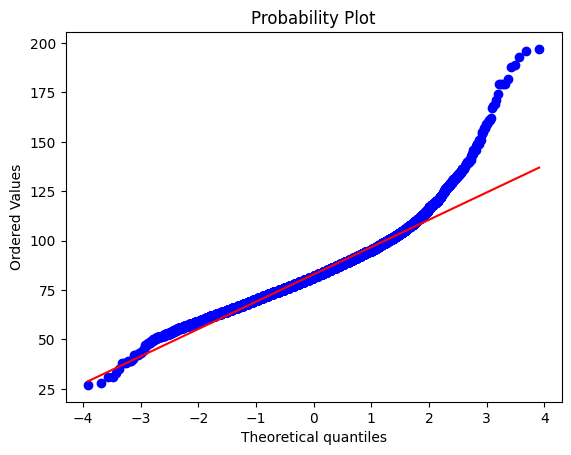

In [37]:
generate_qq_plot(data_df[target_dia])

Base Model

In [38]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     382.1
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:26   Log-Likelihood:                -39221.
No. Observations:               10381   AIC:                         7.849e+04
Df Residuals:                   10357   BIC:                         7.866e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      30.1221      1.638     18.395      0.000      26.912      33.332
bundesland_Kärnten             -1.8919      1.535     -1.232      0.218      -4.902       1.118
bundesland_Niederösterreich    -1.5399      1.371     -1.123      0.261      -4.227       1.148
bundesland_Oberösterreich      -2.1724      1.488     -1.460      0.144      -5.088       0.744
bundesland_Salzburg            -1.0162      1.894     -0.537      0.592      -4.728       2.696
bundesland_Steiermark          -1.7217      1.230     -1.400      0.162      -4.132       0.689
bundesland_Tirol               -2.4597      2.001     -1.229      0.219      -6.382       1.462
bundesland_Vorarlberg           1.4768      2.489      0.593      0.553      -3.403       6.356
bundesland_Wien                -0.9937      1.359     -0.731      0.465      -3.657       1.669
bundesland_not_applicable      -2.0079      1.453     -1.382      0.167      -4.856       0.840
befinden_2                     -0.7073      0.234     -3.025      0.002      -1.166      -0.249
befinden_3                     -0.6651      0.336     -1.980      0.048      -1.324      -0.007
befinden_4                     -0.6342      0.986     -0.643      0.520      -2.566       1.298
befinden_5                      2.8062      1.594      1.761      0.078      -0.317       5.930
geschlecht_m                    1.1284      0.213      5.304      0.000       0.711       1.545
raucher_True                    0.0145      0.290      0.050      0.960      -0.554       0.583
blutzucker_bekannt_True        -0.2313      0.296     -0.782      0.434      -0.811       0.348
cholesterin_bekannt_True        0.0052      0.274      0.019      0.985      -0.532       0.543
in_behandlung_True             -1.6901      0.335     -5.046      0.000      -2.347      -1.033
messwert_bp_sys                 0.5205      0.006     89.748      0.000       0.509       0.532
month                          -0.7030      0.061    -11.577      0.000      -0.822      -0.584
hour                           -0.0852      0.046     -1.834      0.067      -0.176       0.006
day                            -0.0423      0.012     -3.614      0.000      -0.065      -0.019
age                            -0.0777      0.007    -10.516      0.000      -0.092      -0.063
==============================================================================
Omnibus:                     1253.957   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4009.472
Skew:                           0.623   Prob(JB):                         0.00
Kurtosis:                       5.778   Cond. No.                     5.35e+03
==============================================================================

Notes:
[1] Stand

In [39]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      30.1221  &        1.638     &    18.395  &         0.000        &       26.912    &       33.332     \\
\textbf{bundesland\_Kärnten}          &      -1.8919  &        1.535     &    -1.232  &         0.218        &       -4.902    &        1.118     \\
\textbf{bundesland\_Niederösterreich} &      -1.5399  &        1.371     &    -1.123  &         0.261        &       -4.227    &        1.148     \\
\textbf{bundesland\_Oberösterreich}   &      -2.1724  &        1.488     &    -1.460  &         0.144        &       -5.088    &        0.744     \\
\textbf{bundesland\_Salzburg}         &      -1.0162  &        1.894     &    -0.537  &         0.592        &       -4.728    &        2.696     \\
\textbf{bundesland\_Steiermark}       &      -1.7

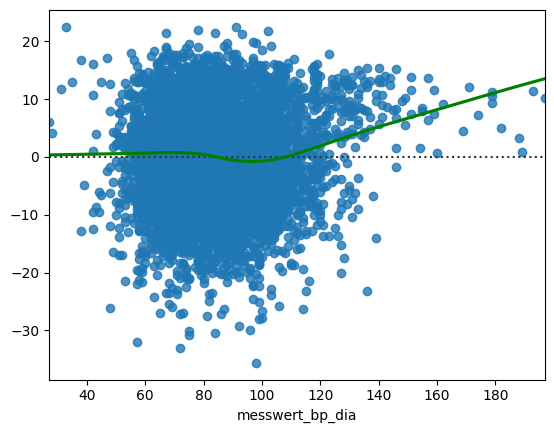

In [40]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [41]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_sys', 'month', 'hour', 'day', 'age']
Train Results:  {'r_2': 0.45878787898119944, 'adjusted_r_2': 0.45795235274265245, 'mse': 112.05514163234812}
Test Results:  {'r_2': 0.45002594113111094, 'adjusted_r_2': 0.448040923097747, 'mse': 102.76043206260391}


In [42]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     549.1
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -39224.
No. Observations:               10381   AIC:                         7.848e+04
Df Residuals:                   10364   BIC:                         7.861e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    28.4311      1.092     26.045      0.000      26.291      30.571
bundesland_Wien               0.7093      0.600      1.183      0.237      -0.466       1.885
bundesland_not_applicable    -0.3027      0.787     -0.385      0.701      -1.845       1.240
befinden_2                   -0.7129      0.234     -3.050      0.002      -1.171      -0.255
befinden_3                   -0.6709      0.336     -1.998      0.046      -1.329      -0.013
befinden_4                   -0.5734      0.984     -0.583      0.560      -2.502       1.356
befinden_5                    2.7800      1.593      1.745      0.081      -0.343       5.903
geschlecht_m                  1.1262      0.213      5.297      0.000       0.709       1.543
raucher_True                  0.0213      0.290      0.073      0.942      -0.547       0.590
blutzucker_bekannt_True      -0.2257      0.295     -0.764      0.445      -0.805       0.354
cholesterin_bekannt_True      0.0036      0.274      0.013      0.990      -0.534       0.541
in_behandlung_True           -1.6730      0.335     -4.998      0.000      -2.329      -1.017
messwert_bp_sys               0.5205      0.006     89.817      0.000       0.509       0.532
month                        -0.7019      0.061    -11.564      0.000      -0.821      -0.583
hour                         -0.0867      0.046     -1.867      0.062      -0.178       0.004
day                          -0.0426      0.012     -3.645      0.000      -0.065      -0.020
age                          -0.0775      0.007    -10.501      0.000      -0.092      -0.063
==============================================================================
Omnibus:                     1249.166   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3990.522
Skew:                           0.620   Prob(JB):                         0.00
Kurtosis:                       5.772   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                     & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                   &      28.4311  &        1.092     &    26.045  &         0.000        &       26.291    &       30.571     \\
\textbf{bundesland\_Wien}            &       0.7093  &        0.600     &     1.183  &         0.237        &       -0.466    &        1.885     \\
\textbf{bundesland\_not\_applicable} &      -0.3027  &        0.787     &    -0.385  &         0.701        &       -1.845    &        1.240     \\
\textbf{befinden\_2}                 &      -0.7129  &        0.234     &    -3.050  &         0.002        &       -1.171    &       -0.255     \\
\textbf{befinden\_3}                 &      -0.6709  &        0.336     &    -1.998  &         0.046        &       -1.329    &       -0.013     \\
\textbf{befinden\_4}                 &      -0.5734  & 

In [44]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),112.001,102.823,0.459,0.450,0.458,0.447
1,LM (Best Subset),102.760,112.055,0.450,0.459,0.448,0.458


In [45]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 112.001150 & 102.823328 & 0.459049 & 0.449689 & 0.457847 & 0.446830 \\
1 & LM (Best Subset) & 102.760432 & 112.055142 & 0.450026 & 0.458788 & 0.448041 & 0.457952 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [46]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

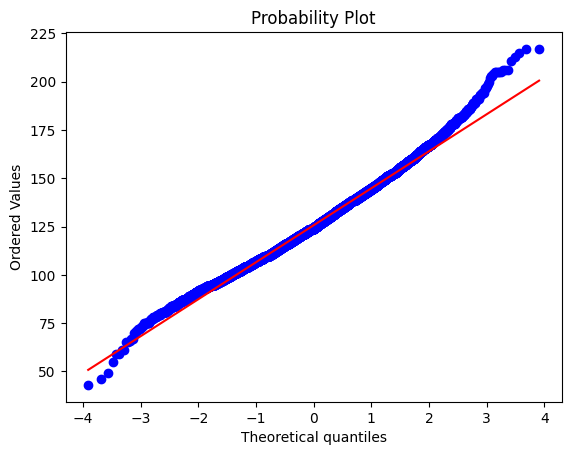

In [47]:
generate_qq_plot(data_df[target_sys])

Base Model

In [48]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     479.9
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -41709.
No. Observations:               10381   AIC:                         8.347e+04
Df Residuals:                   10357   BIC:                         8.364e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      36.5628      2.084     17.546      0.000      32.478      40.648
bundesland_Kärnten              0.5781      1.951      0.296      0.767      -3.247       4.403
bundesland_Niederösterreich     0.0720      1.742      0.041      0.967      -3.343       3.487
bundesland_Oberösterreich       0.1615      1.891      0.085      0.932      -3.544       3.867
bundesland_Salzburg            -4.0643      2.406     -1.689      0.091      -8.781       0.652
bundesland_Steiermark           0.2224      1.563      0.142      0.887      -2.841       3.286
bundesland_Tirol               -2.4632      2.543     -0.969      0.333      -7.447       2.521
bundesland_Vorarlberg          -5.8062      3.163     -1.836      0.066     -12.006       0.394
bundesland_Wien                -0.6802      1.726     -0.394      0.694      -4.064       2.704
bundesland_not_applicable      -0.7032      1.846     -0.381      0.703      -4.323       2.916
befinden_2                      0.9123      0.297      3.071      0.002       0.330       1.495
befinden_3                      0.4119      0.427      0.965      0.335      -0.425       1.249
befinden_4                      1.2675      1.252      1.012      0.312      -1.187       3.722
befinden_5                     -0.0066      2.025     -0.003      0.997      -3.977       3.963
geschlecht_m                    1.7843      0.270      6.605      0.000       1.255       2.314
raucher_True                    0.1605      0.369      0.435      0.663      -0.563       0.884
blutzucker_bekannt_True         0.7833      0.376      2.085      0.037       0.047       1.520
cholesterin_bekannt_True       -0.3305      0.348     -0.949      0.343      -1.013       0.352
in_behandlung_True              6.4238      0.421     15.242      0.000       5.598       7.250
messwert_bp_dia                 0.8405      0.009     89.748      0.000       0.822       0.859
month                           0.7989      0.077     10.339      0.000       0.647       0.950
hour                           -0.0399      0.059     -0.676      0.499      -0.156       0.076
day                             0.0775      0.015      5.217      0.000       0.048       0.107
age                             0.2289      0.009     24.983      0.000       0.211       0.247
==============================================================================
Omnibus:                      117.156   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.495
Skew:                           0.191   Prob(JB):                     1.14e-31
Kurtosis:                       3.429   Cond. No.                     3.84e+03
==============================================================================

Notes:
[1] Stand

In [49]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      36.5628  &        2.084     &    17.546  &         0.000        &       32.478    &       40.648     \\
\textbf{bundesland\_Kärnten}          &       0.5781  &        1.951     &     0.296  &         0.767        &       -3.247    &        4.403     \\
\textbf{bundesland\_Niederösterreich} &       0.0720  &        1.742     &     0.041  &         0.967        &       -3.343    &        3.487     \\
\textbf{bundesland\_Oberösterreich}   &       0.1615  &        1.891     &     0.085  &         0.932        &       -3.544    &        3.867     \\
\textbf{bundesland\_Salzburg}         &      -4.0643  &        2.406     &    -1.689  &         0.091        &       -8.781    &        0.652     \\
\textbf{bundesland\_Steiermark}       &       0.2

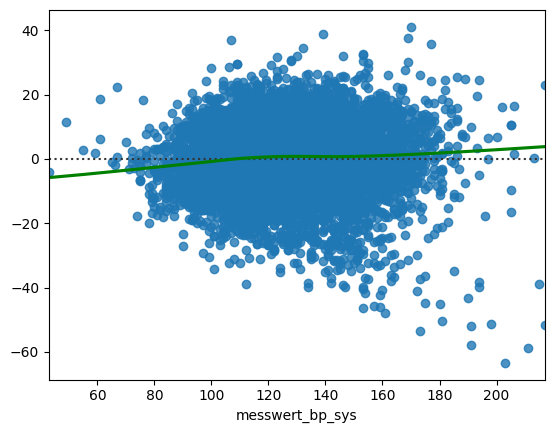

In [50]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Best Subset

In [51]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_dia', 'month', 'hour', 'day', 'age']
Train Results:  {'r_2': 0.5153538795191284, 'adjusted_r_2': 0.5146056801822223, 'mse': 181.0668598559059}
Test Results:  {'r_2': 0.5154071510312106, 'adjusted_r_2': 0.5136581130019977, 'mse': 175.29448023000293}


In [52]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     688.8
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        18:05:44   Log-Likelihood:                -41715.
No. Observations:               10381   AIC:                         8.346e+04
Df Residuals:                   10364   BIC:                         8.359e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    36.6964      1.386     26.472      0.000      33.979      39.414
bundesland_Wien              -0.8518      0.762     -1.118      0.264      -2.346       0.642
bundesland_not_applicable    -0.8685      1.000     -0.868      0.385      -2.829       1.092
befinden_2                    0.9279      0.297      3.123      0.002       0.345       1.510
befinden_3                    0.4330      0.427      1.014      0.311      -0.404       1.270
befinden_4                    1.1593      1.251      0.927      0.354      -1.293       3.611
befinden_5                    0.0384      2.026      0.019      0.985      -3.932       4.009
geschlecht_m                  1.7891      0.270      6.624      0.000       1.260       2.319
raucher_True                  0.1678      0.369      0.455      0.649      -0.555       0.891
blutzucker_bekannt_True       0.7930      0.376      2.112      0.035       0.057       1.529
cholesterin_bekannt_True     -0.3162      0.348     -0.908      0.364      -0.999       0.367
in_behandlung_True            6.4061      0.421     15.204      0.000       5.580       7.232
messwert_bp_dia               0.8410      0.009     89.817      0.000       0.823       0.859
month                         0.8023      0.077     10.386      0.000       0.651       0.954
hour                         -0.0418      0.059     -0.707      0.479      -0.158       0.074
day                           0.0771      0.015      5.196      0.000       0.048       0.106
age                           0.2285      0.009     24.954      0.000       0.211       0.246
==============================================================================
Omnibus:                      117.045   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.960
Skew:                           0.192   Prob(JB):                     1.49e-31
Kurtosis:                       3.426   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                     & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                   &      36.6964  &        1.386     &    26.472  &         0.000        &       33.979    &       39.414     \\
\textbf{bundesland\_Wien}            &      -0.8518  &        0.762     &    -1.118  &         0.264        &       -2.346    &        0.642     \\
\textbf{bundesland\_not\_applicable} &      -0.8685  &        1.000     &    -0.868  &         0.385        &       -2.829    &        1.092     \\
\textbf{befinden\_2}                 &       0.9279  &        0.297     &     3.123  &         0.002        &        0.345    &        1.510     \\
\textbf{befinden\_3}                 &       0.4330  &        0.427     &     1.014  &         0.311        &       -0.404    &        1.270     \\
\textbf{befinden\_4}                 &       1.1593  & 

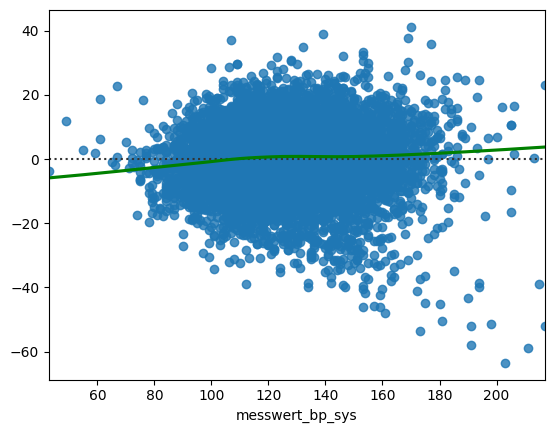

In [54]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [55]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),180.856,175.428,0.516,0.515,0.515,0.513
1,LM (Best Subset),175.294,181.067,0.515,0.515,0.514,0.515


In [56]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 180.856454 & 175.428492 & 0.515917 & 0.515037 & 0.514842 & 0.512517 \\
1 & LM (Best Subset) & 175.294480 & 181.066860 & 0.515407 & 0.515354 & 0.513658 & 0.514606 \\
\bottomrule
\end{tabular}

